<a href="https://colab.research.google.com/github/tofighi/ITM760/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#you need to import the following libraries to use pagerank
#Create an empty graph: 
#Our first example of a graph will be an empty graph. 
#The following little Python script uses NetworkX to create an empty graph:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
G_Altgeld=nx.DiGraph()

['1:Office 366 = 1']
['2:Bottom of Spiral = 2']
['3:Soda Machine = 1']
['4:Office 326 = 3']
['5:Post Office = 2']
['6:Library = 2']
['7:Wall Across Room 441 = 2']
['8:Room 239 = 3']


/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:474: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  label=label,


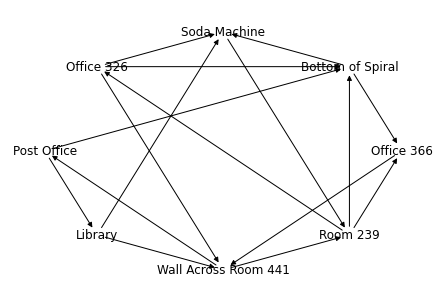

In [2]:
#let's assume that we would like to find the most important location. Each node will be a location in the company and 
#edges represent how these locations are connected in the company building
#Adding Nodes to our Graph: Now we will add some nodes to our graph. 
#We can add a list of nodes with the method add_nodes_from():
locations = ["Office 366","Bottom of Spiral","Soda Machine","Office 326",
                  "Post Office","Library","Wall Across Room 441","Room 239"]
G_Altgeld.add_nodes_from(locations)

#Adding Edges to our Graph: G can also be created or increased by adding one edge at a time by the method add_edge(),
#which has the two nodes of the edge as the two parameters. We can add a bunch of edges as a list of edges in 
#the form of 2 tuples.

G_Altgeld.add_edges_from([('Office 366','Wall Across Room 441'),
                         ('Bottom of Spiral','Office 366'),('Bottom of Spiral','Soda Machine'),
                         ('Soda Machine','Room 239'),
                         ('Office 326','Soda Machine'),('Office 326','Bottom of Spiral'),('Office 326','Wall Across Room 441'),
                         ('Post Office','Bottom of Spiral'),('Post Office','Library'),
                         ('Library','Soda Machine'),('Library','Wall Across Room 441'),
                         ('Wall Across Room 441','Post Office'),('Wall Across Room 441','Room 239'),
                         ('Room 239', 'Office 366'),('Room 239','Bottom of Spiral'),('Room 239','Office 326')])
i = 0
for name in locations:
    i = i+1
    print(["%d:%s = %s"% (i,name,str(len(G_Altgeld.out_edges(name))))])
                
nx.draw_circular(G_Altgeld,node_color='', with_labels = True)
plt.show() # display

In [3]:
#now we call the following function to get the results of node ranking using pagerank
nx.pagerank(G_Altgeld, max_iter=100)
#the most important node is the one with the highest score.

{'Bottom of Spiral': 0.13675910853950657,
 'Library': 0.0589563584488253,
 'Office 326': 0.07523608554852279,
 'Office 366': 0.13335839535710858,
 'Post Office': 0.09460363925975722,
 'Room 239': 0.19936343846976667,
 'Soda Machine': 0.1232452979149381,
 'Wall Across Room 441': 0.1784776764615747}

#Using Sympy to calculate pagerank

In [4]:
import sympy as sp
sp.init_printing(use_unicode=True)

In [5]:
flowMat = sp.Matrix([[0,1/2,1,0], [1/3,0,0,1/2], [1/3,0,0,1/2], [1/3,1/2,0,0]])
flowMat

⎡        0          0.5  1   0 ⎤
⎢                              ⎥
⎢0.333333333333333   0   0  0.5⎥
⎢                              ⎥
⎢0.333333333333333   0   0  0.5⎥
⎢                              ⎥
⎣0.333333333333333  0.5  0   0 ⎦

In [6]:
flowMat**4

⎡      0.375        0.125   0.25  0.5625⎤
⎢                                       ⎥
⎢0.208333333333333  0.3125  0.25  0.125 ⎥
⎢                                       ⎥
⎢0.208333333333333  0.3125  0.25  0.125 ⎥
⎢                                       ⎥
⎣0.208333333333333   0.25   0.25  0.1875⎦

In [7]:
rank = sp.Matrix([1/4,1/4,1/4,1/4])
rank

⎡0.25⎤
⎢    ⎥
⎢0.25⎥
⎢    ⎥
⎢0.25⎥
⎢    ⎥
⎣0.25⎦

In [8]:
rank = sp.Matrix([1/4,1/4,1/4,1/4])
print(rank)
eps = 0.000000000000001
max_iter = 100
n=0
for i in range(max_iter):
  n = n+1
  temp = rank
  rank = flowMat*rank
  diff = np.linalg.norm(np.array(temp ,dtype=np.float32 )-np.array(rank ,dtype=np.float32))
  print(rank)
  if diff <  eps:
    print("steady rank is as follows after ", n, " stages", "for eps= ", eps, "\n", rank )
    break

Matrix([[0.250000000000000], [0.250000000000000], [0.250000000000000], [0.250000000000000]])
Matrix([[0.375000000000000], [0.208333333333333], [0.208333333333333], [0.208333333333333]])
Matrix([[0.312500000000000], [0.229166666666667], [0.229166666666667], [0.229166666666667]])
Matrix([[0.343750000000000], [0.218750000000000], [0.218750000000000], [0.218750000000000]])
Matrix([[0.328125000000000], [0.223958333333333], [0.223958333333333], [0.223958333333333]])
Matrix([[0.335937500000000], [0.221354166666667], [0.221354166666667], [0.221354166666667]])
Matrix([[0.332031250000000], [0.222656250000000], [0.222656250000000], [0.222656250000000]])
Matrix([[0.333984375000000], [0.222005208333333], [0.222005208333333], [0.222005208333333]])
Matrix([[0.333007812500000], [0.222330729166667], [0.222330729166667], [0.222330729166667]])
Matrix([[0.333496093750000], [0.222167968750000], [0.222167968750000], [0.222167968750000]])
Matrix([[0.333251953125000], [0.222249348958333], [0.222249348958333],